In [48]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd())) 
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
import waterfall_chart
import plotly.graph_objects as go
import mplfinance as mpf

In [49]:
table = pq.read_table('../../pipeline_model/ml_pipeline/temp_data/btc_usdt_1m.parquet')
df = table.to_pandas()

# Descriptive Statistics

In [50]:
df.head(5)

,timestamp,open,high,low,close,volume
0,1742188260000,83459.54,83459.54,83391.76,83391.77,4.62491
1,1742188320000,83391.76,83399.26,83334.61,83339.45,41.14364
2,1742188380000,83339.45,83348.99,83221.71,83234.01,24.45911
3,1742188440000,83234.00,83305.92,83196.90,83305.59,38.44958
4,1742188500000,83305.59,83305.59,83241.51,83303.23,22.13891


In [51]:
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='ms')
df.head(5)

,timestamp,open,high,low,close,volume
0,2025-03-17 05:11:00,83459.54,83459.54,83391.76,83391.77,4.62491
1,2025-03-17 05:12:00,83391.76,83399.26,83334.61,83339.45,41.14364
2,2025-03-17 05:13:00,83339.45,83348.99,83221.71,83234.01,24.45911
3,2025-03-17 05:14:00,83234.00,83305.92,83196.90,83305.59,38.44958
4,2025-03-17 05:15:00,83305.59,83305.59,83241.51,83303.23,22.13891


In [52]:
df.describe()

,timestamp,open,high,low,close,volume
count,43200,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000
mean,2025-04-01 05:10:30,83609.567331,83641.053370,83578.394454,83609.574943,17.974111
min,2025-03-17 05:11:00,74610.000000,74737.820000,74508.000000,74610.000000,0.126500
25%,2025-03-24 17:10:45,82637.990000,82668.610000,82609.287500,82637.990000,4.594535
50%,2025-04-01 05:10:30,83848.135000,83877.605000,83818.350000,83848.135000,9.190210
75%,2025-04-08 17:10:15,85009.477500,85033.210000,84983.692500,85009.477500,19.504593
max,2025-04-16 05:10:00,88736.400000,88765.430000,88647.910000,88736.390000,1225.063880
std,NaN,2561.812400,2552.323083,2571.031907,2561.811312,32.174839


In [53]:
df.corr()

,timestamp,open,high,low,close,volume
timestamp,1.000000,-0.361709,-0.360735,-0.362603,-0.361709,0.137771
open,-0.361709,1.000000,0.999837,0.999856,0.999723,-0.192398
high,-0.360735,0.999837,1.000000,0.999743,0.999858,-0.183769
low,-0.362603,0.999856,0.999743,1.000000,0.999856,-0.199575
close,-0.361709,0.999723,0.999858,0.999856,1.000000,-0.191519
volume,0.137771,-0.192398,-0.183769,-0.199575,-0.191519,1.000000


In [54]:
df.cov()

,timestamp,open,high,low,close,volume
timestamp,5.598850e+29,-6.933554e+17,-6.889273e+17,-6.975708e+17,-6.933555e+17,3.316837e+15
open,-6.933554e+17,6.562883e+06,6.537506e+06,6.585556e+06,6.561059e+06,-1.585858e+04
high,-6.889273e+17,6.537506e+06,6.514353e+06,6.560419e+06,6.537643e+06,-1.509126e+04
low,-6.975708e+17,6.585556e+06,6.560419e+06,6.610205e+06,6.585551e+06,-1.650936e+04
close,-6.933555e+17,6.561059e+06,6.537643e+06,6.585551e+06,6.562877e+06,-1.578612e+04
volume,3.316837e+15,-1.585858e+04,-1.509126e+04,-1.650936e+04,-1.578612e+04,1.035220e+03


# Ploting values

### Histogram

In [55]:
def plot_individual_histograms(df, bins=20):
    # Check if the DataFrame contains numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    if len(numeric_columns) == 0:
        print("No numeric columns available for histogram.")
        return

    # Plot individual histograms for each numeric column
    for column in numeric_columns:
        plt.figure(figsize=(6, 4))  # Set the figure size for each plot
        sns.histplot(df[column], kde=True, bins=bins)
        plt.title(f"Histogram of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

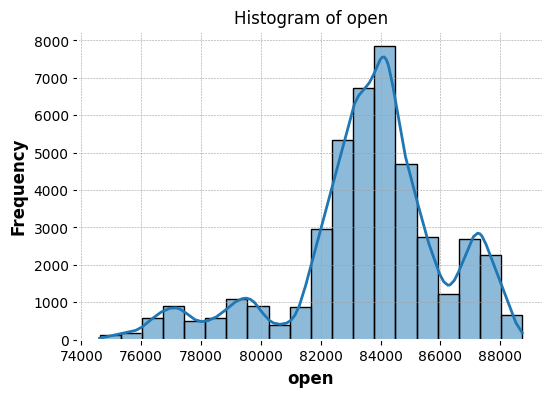

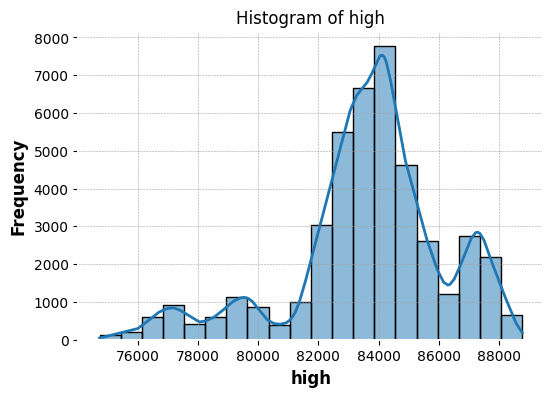

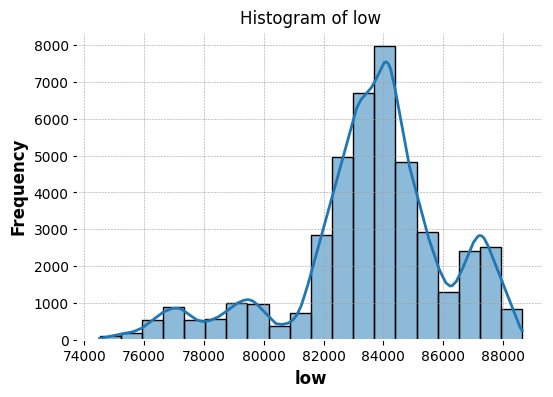

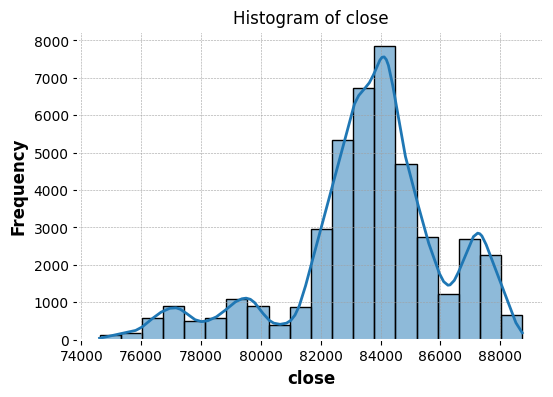

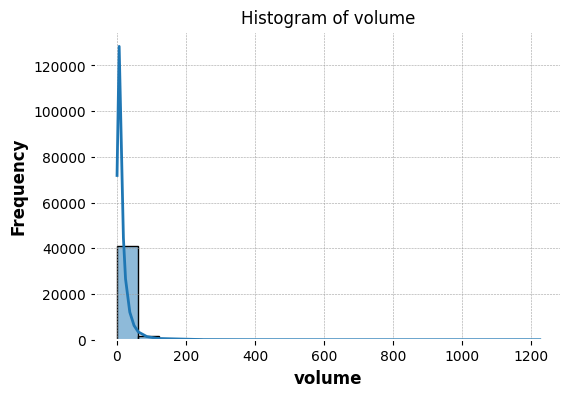

In [56]:
plot_individual_histograms(df, bins=20)

### Line chart

In [57]:
def plot_line_chart(df):
    # Ensure 'timestamps' exists and is a datetime type
    if 'timestamp' not in df.columns:
        print("The DataFrame does not contain a 'timestamp' column.")
        return
    
    if not pd.api.types.is_datetime64_any_dtype(df['timestamp']):
        try:
            df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
        except Exception as e:
            print(f"Error converting 'timestamp' to datetime: {e}")
            return

    # Select numeric columns
    numeric_columns = df.select_dtypes(include='number').columns
    
    if len(numeric_columns) == 0:
        print("No numeric columns available to plot.")
        return

    # Plot each numeric column as a line over time
    for column in numeric_columns:
        plt.figure(figsize=(8, 4))
        sns.lineplot(x='timestamp', y=column, data=df)
        plt.title(f"Line Chart of {column}")
        plt.xlabel("Timestamp")
        plt.ylabel(column)
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

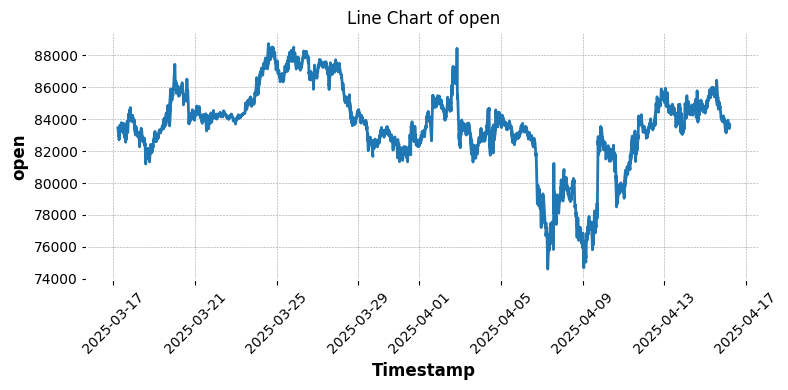

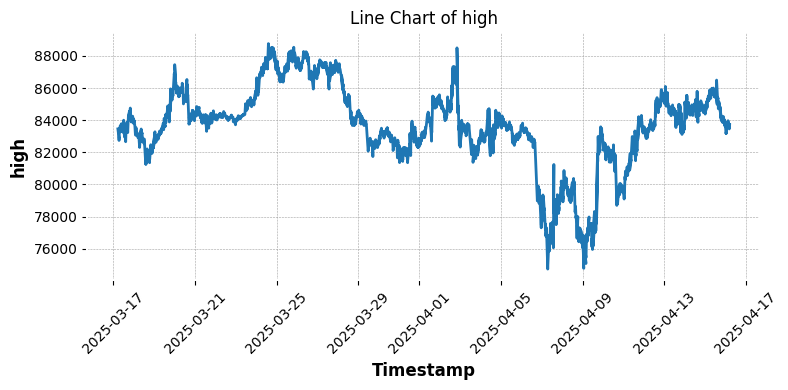

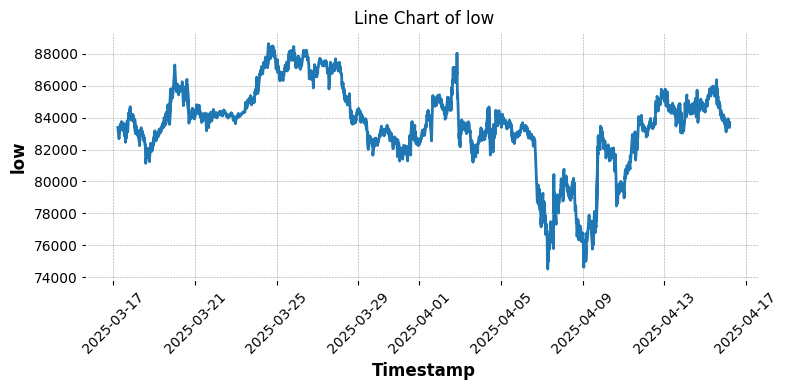

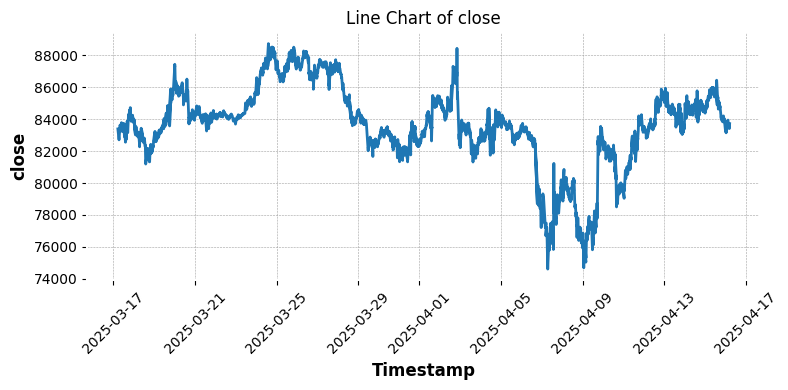

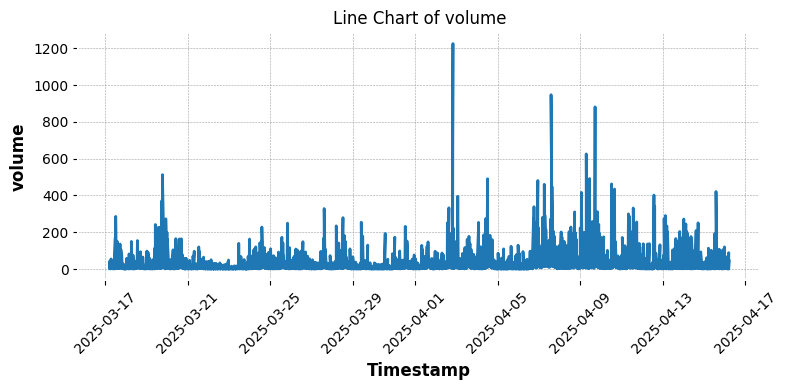

In [58]:
plot_line_chart(df)

In [59]:
def scatter_plot(df, label, color='blue', size=10, alpha=0.5, numeric_columns=None):
    
    if len(numeric_columns) == 0:
        print("No numeric columns available for histogram.")
        return

    for column in numeric_columns:
        if label is not column:
            plt.figure(figsize=(10, 6))
            plt.scatter(df[label], df[column], c=color, s=size, alpha=alpha)
            plt.xlabel(label)
            plt.ylabel(column)
            plt.title(f'Scatter plot of {column} vs {label}')
            plt.grid(True)
            plt.show()

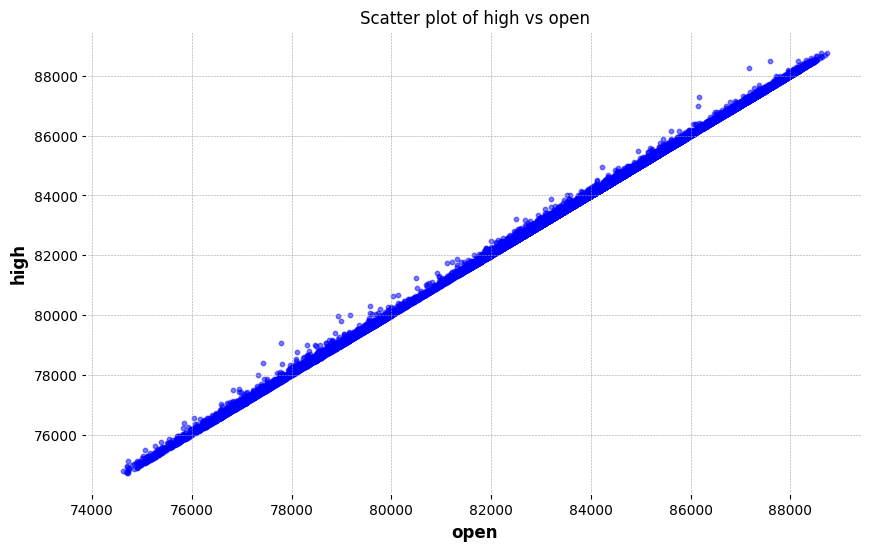

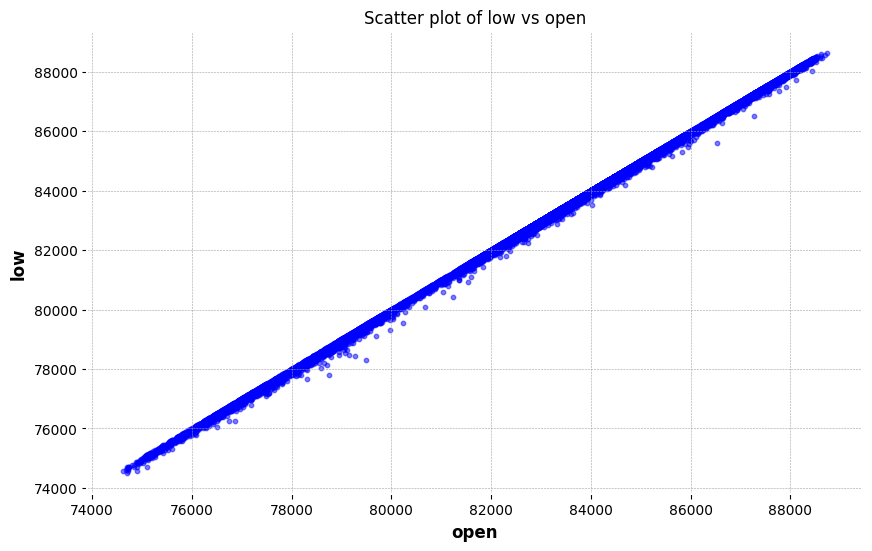

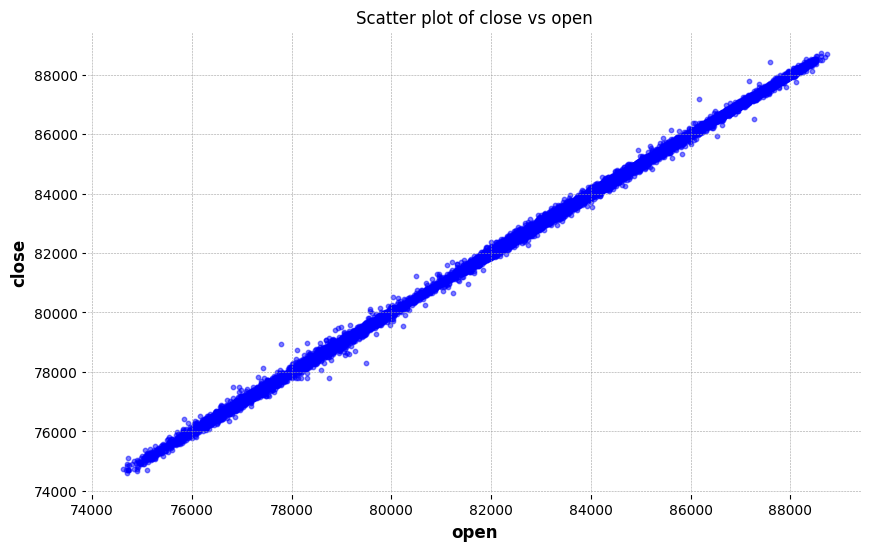

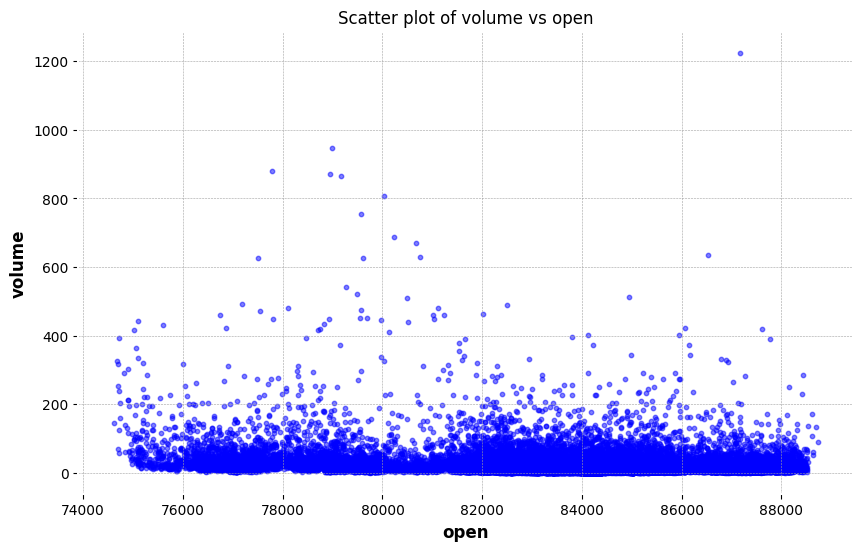

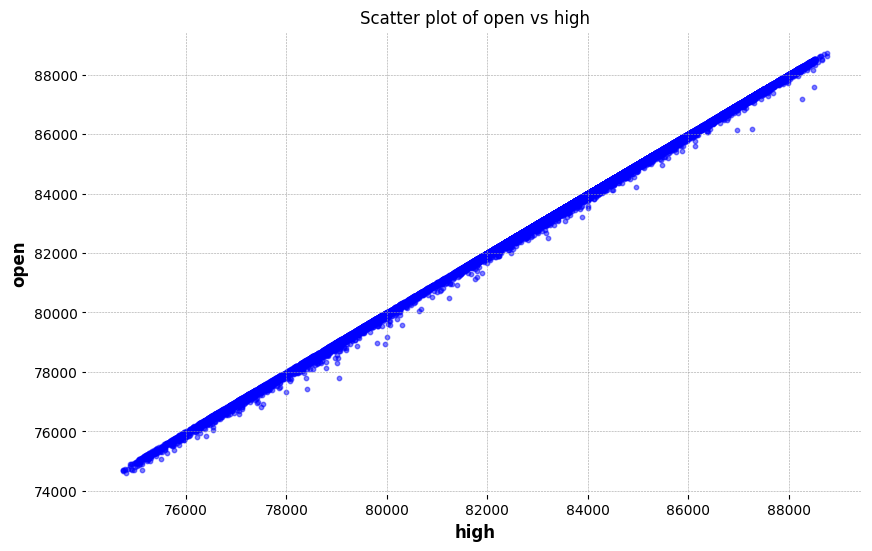

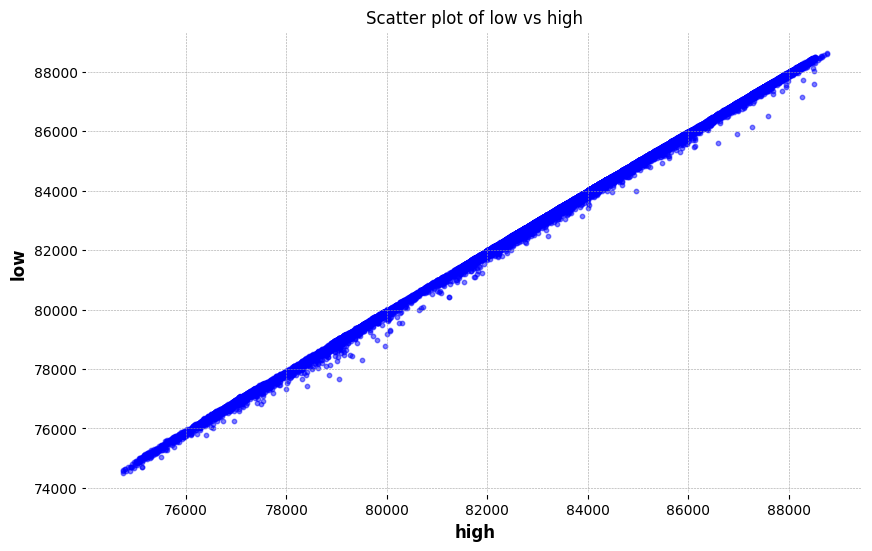

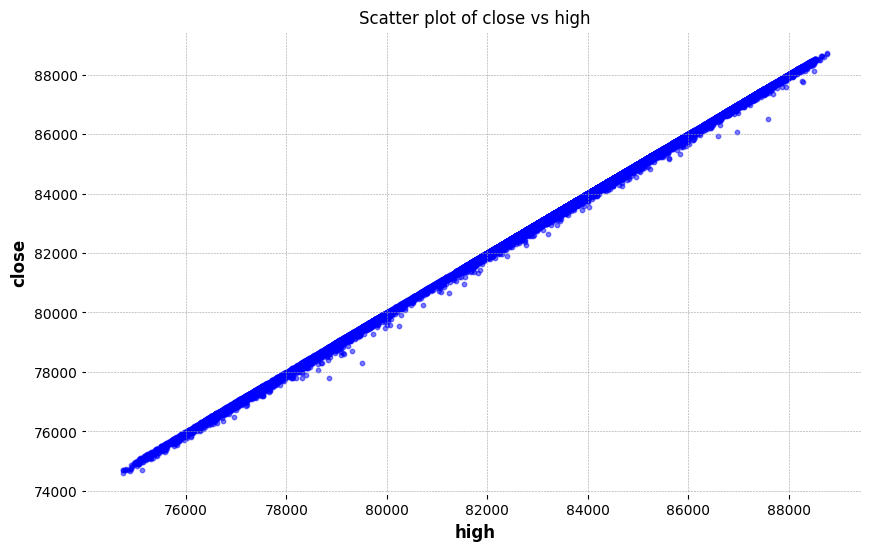

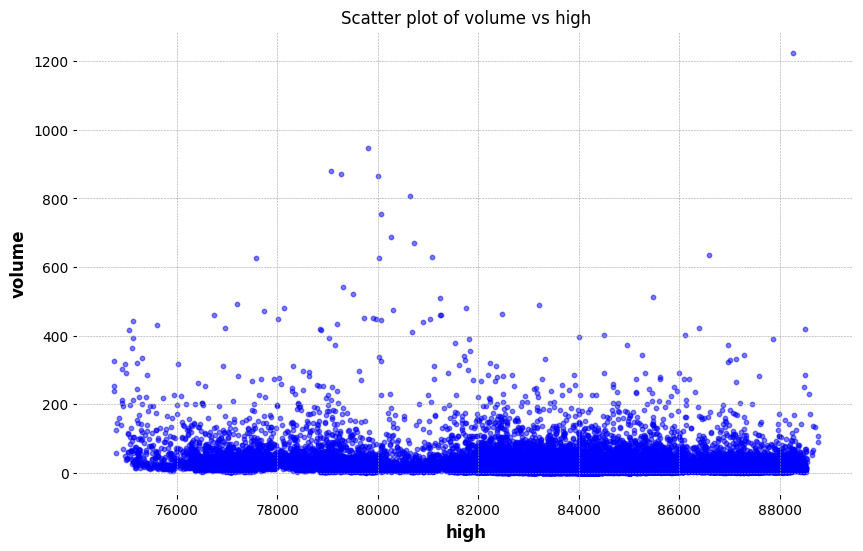

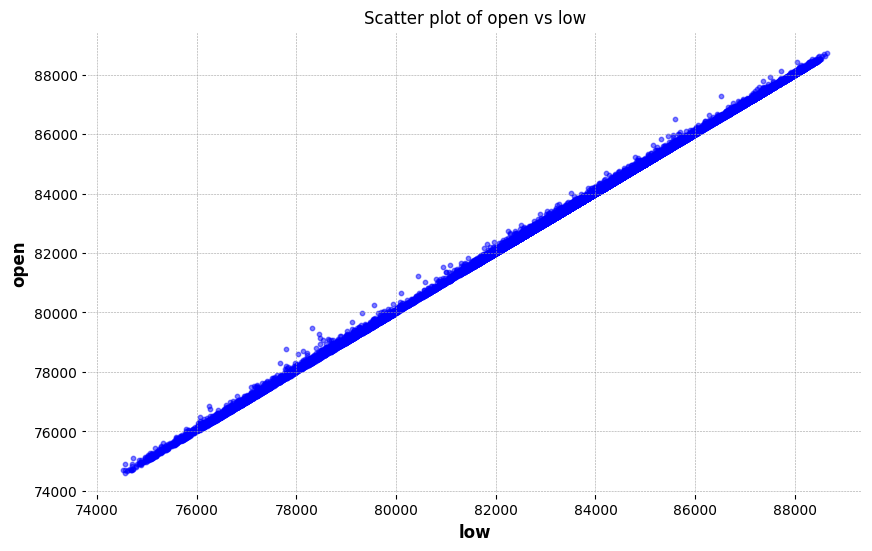

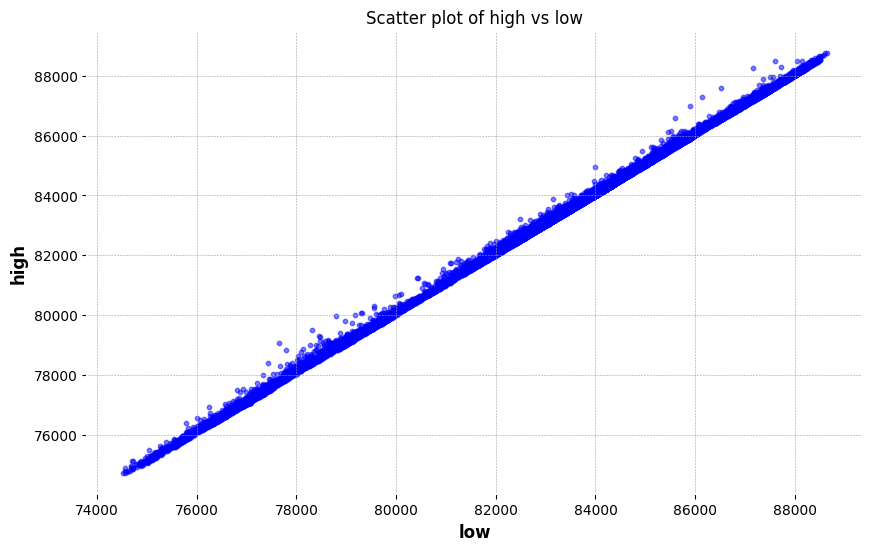

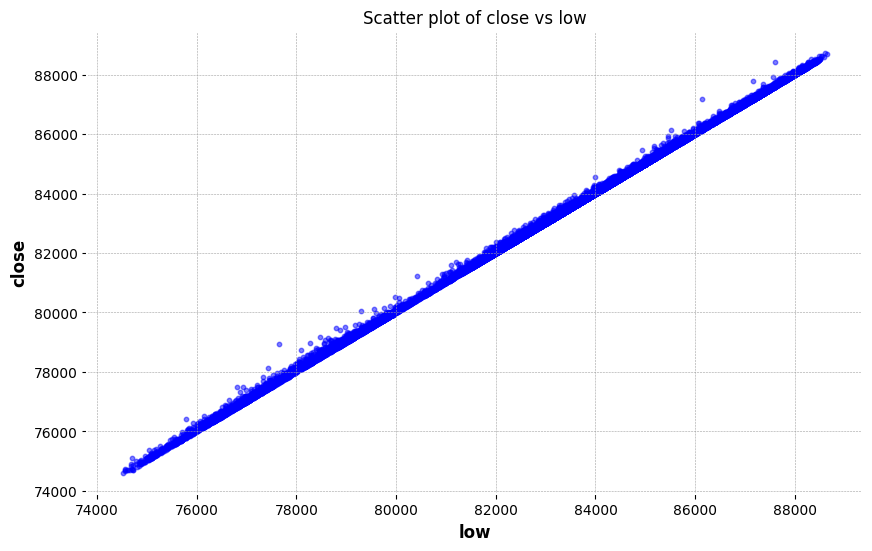

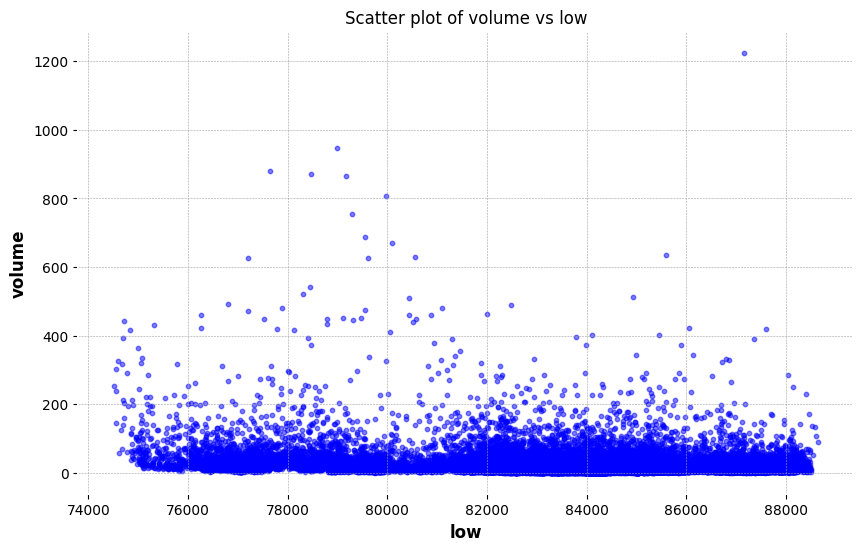

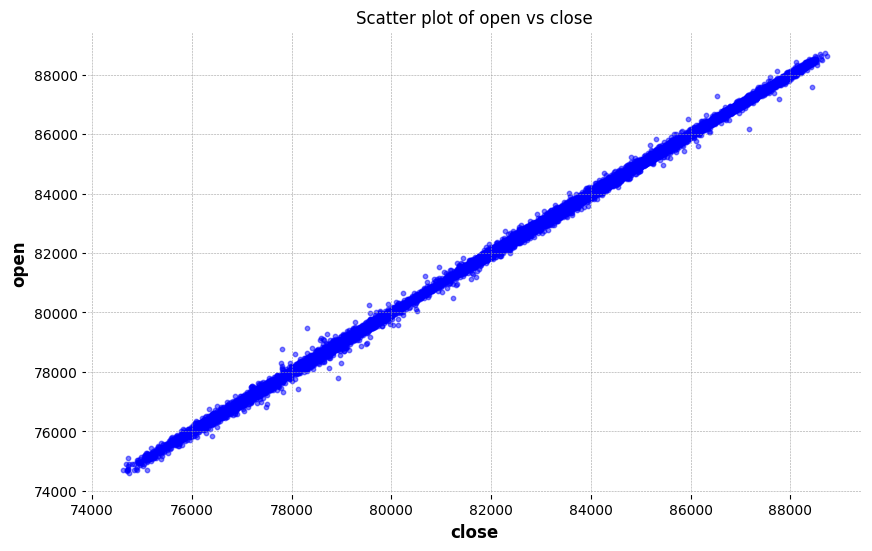

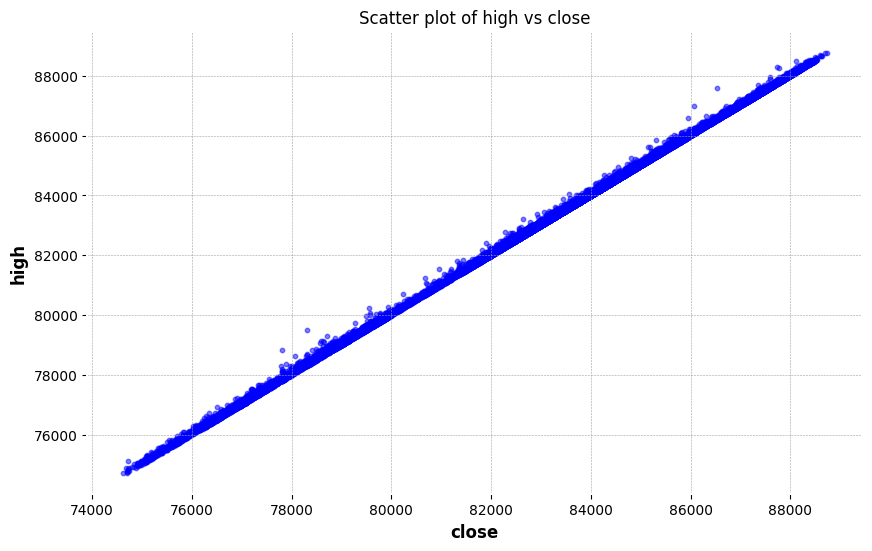

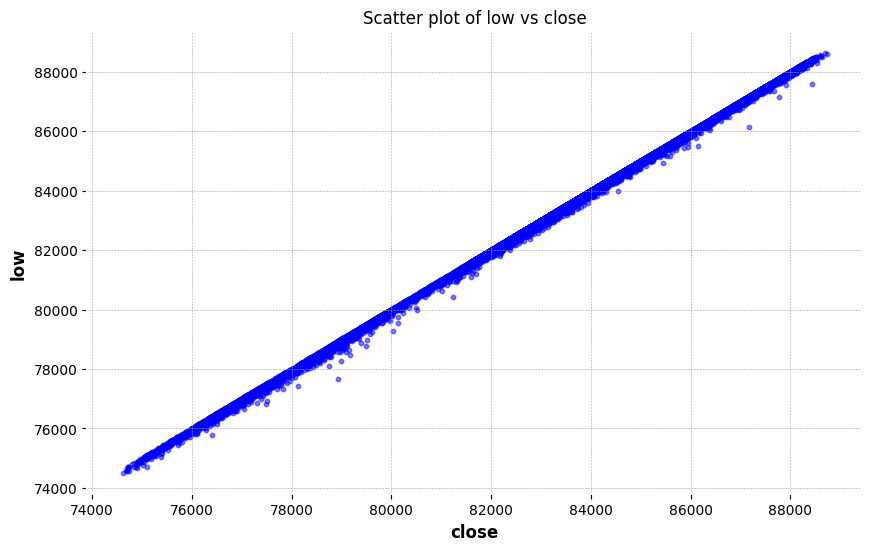

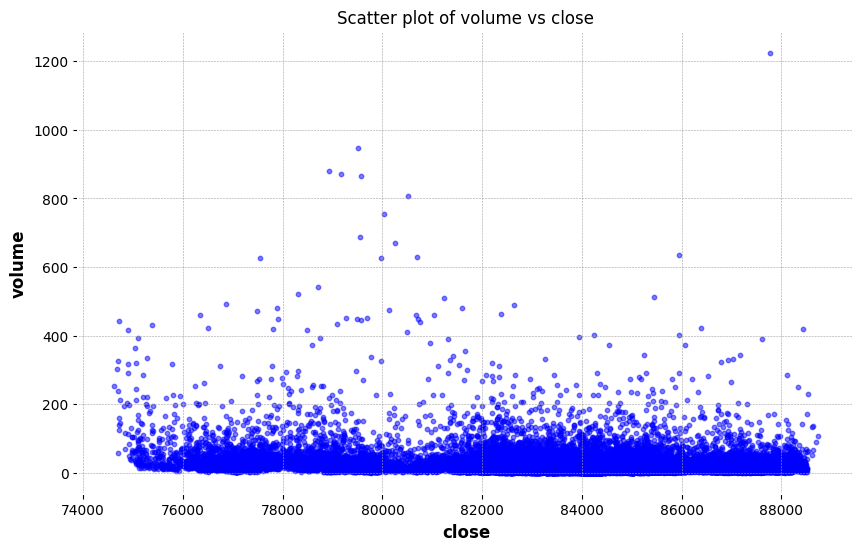

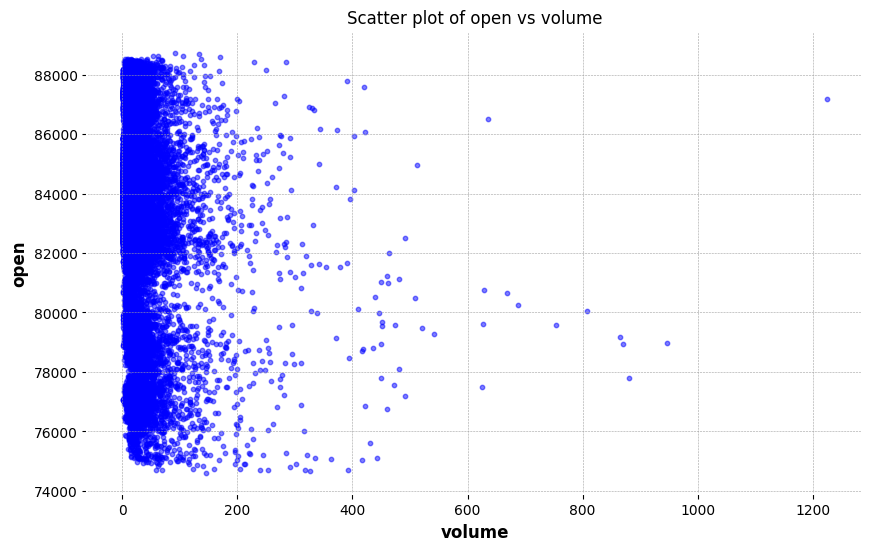

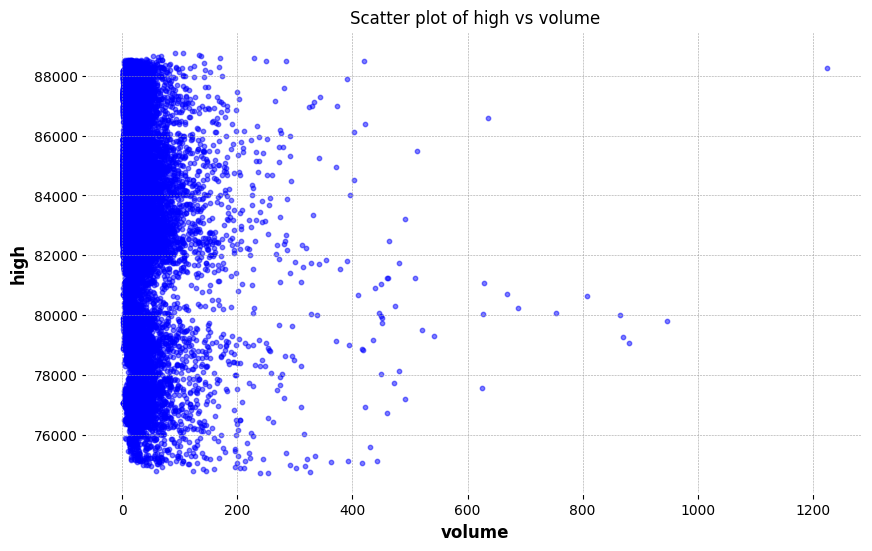

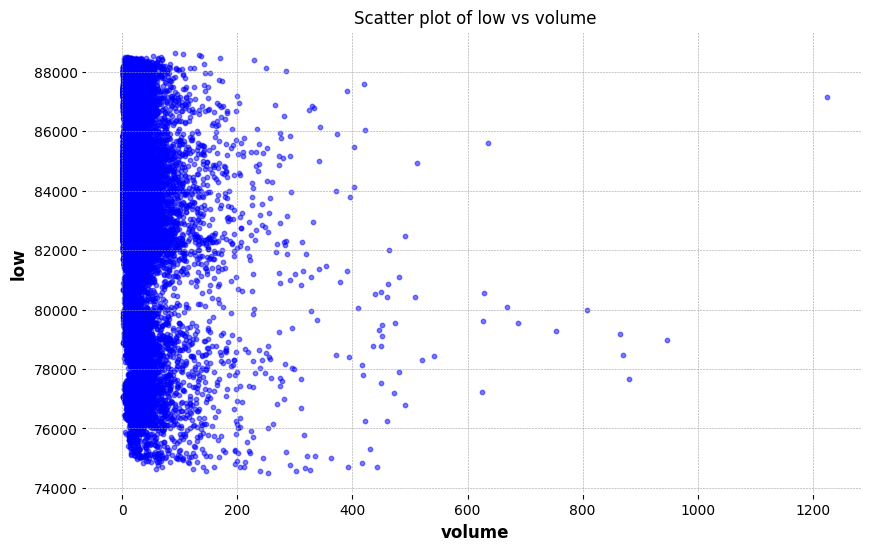

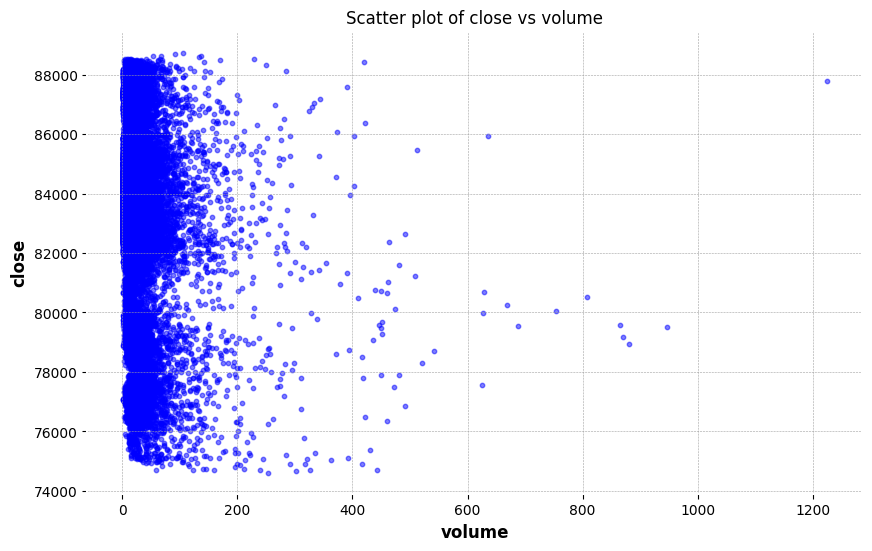

In [60]:
numeric_columns = df.select_dtypes(include=['number']).columns
for label in numeric_columns:
    scatter_plot(df, label=label, numeric_columns=numeric_columns)

### Box plot

In [61]:
def box_plots(df):
    # Check if the DataFrame contains numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    if len(numeric_columns) == 0:
        print("No numeric columns available for boxplot.")
        return
    
    # Plot individual boxplots for each numeric column
    for column in numeric_columns:
        plt.figure(figsize=(6, 4))  # Set the figure size for each plot
        sns.boxplot(x=df[column])
        plt.title(f"Boxplot of {column}")
        plt.show()

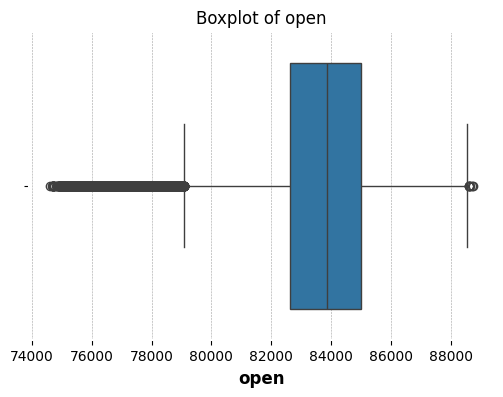

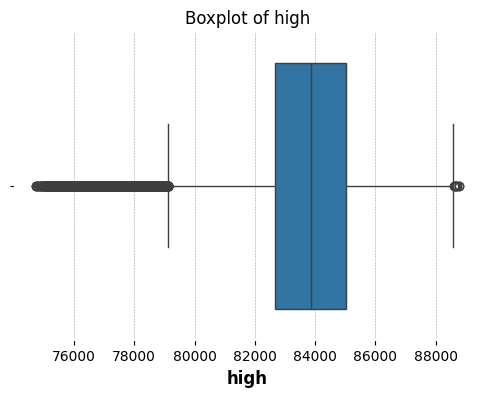

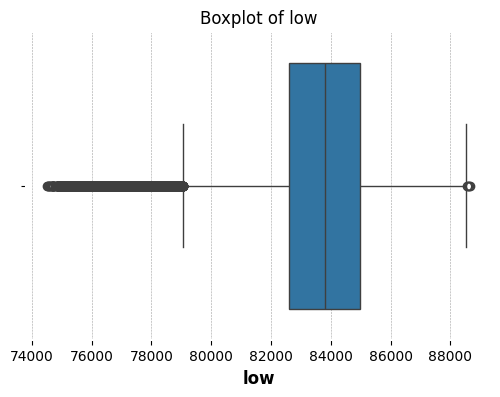

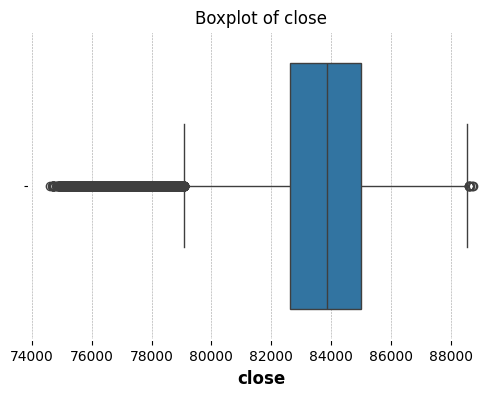

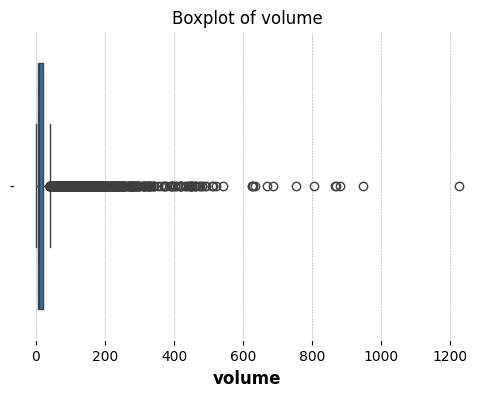

In [62]:
box_plots(df)

### Candlestick plot

In [64]:
df = df.sort_values('timestamp')

# Create candlestick figure
fig = go.Figure(data=[
    go.Candlestick(
        x=df['timestamp'],
        open=df['open'],
        high=df['high'],
        low=df['low'],
        close=df['close'],
        name='OHLC'
    )
])

# Add layout options
fig.update_layout(
    title='Interactive Candlestick Chart',
    xaxis_title='Timestamp',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False,
    template='plotly_dark',
    height=600
)

fig.write_html("candlestick_chart.html", auto_open=True)